## Arboles de Decisión para Clasificación

Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



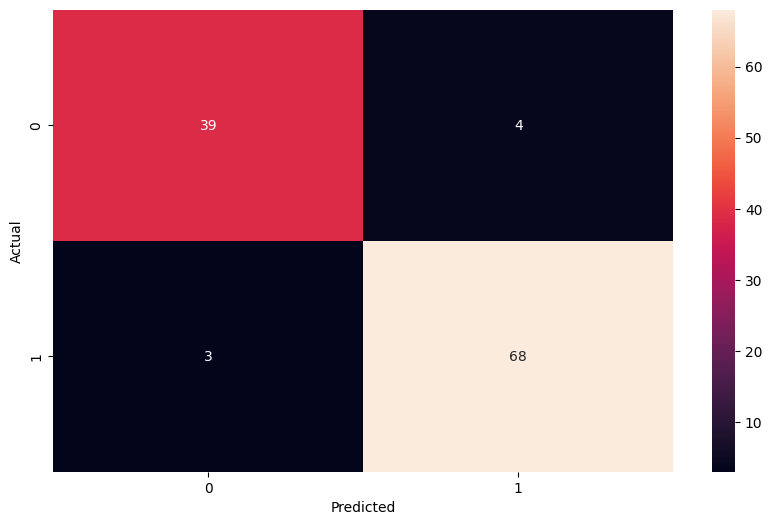

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree CLassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data_cancer = load_breast_cancer()

X_df = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
y_df = pd.DataFrame(data_cancer.target, columns=["target"])

cancer_ds = pd.concat([X_df, y_df], axis=1)

seed = 42
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.2, random_state=seed
)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

print(classification_report(y_test, y_pred))

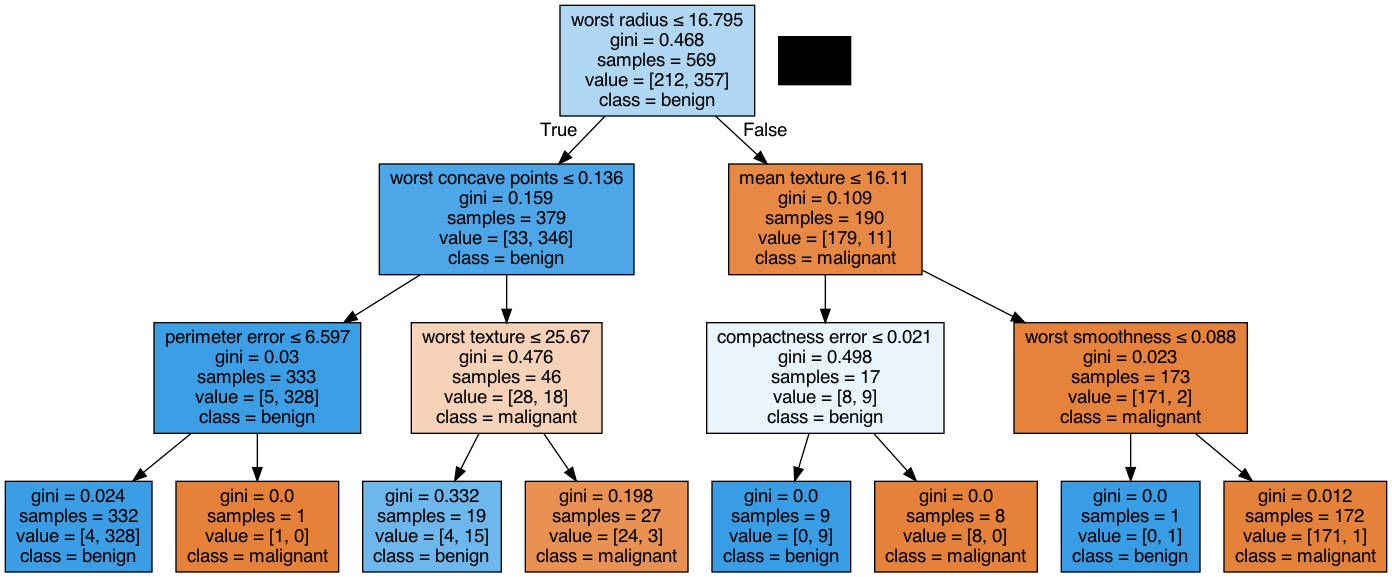

In [2]:
# Usuarios de Windows: descomentar la siguiente línea.
# !pip3 install pydotplus

# Usuarios de macOS: descomentar las siguientes dos líneas (puede demorar un poco).
# !brew install graphviz
# !pip install -U pydotplus
import pydotplus
from six import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz


def dibujar_arbol(
    clf, c_name=data_cancer.target_names, f_name=data_cancer.feature_names
):

    dot_data = StringIO()

    export_graphviz(
        clf,
        out_file=dot_data,
        filled=True,
        class_names=c_name,
        feature_names=f_name,
        special_characters=True,
    )

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    display(Image(graph.create_png()))


arbol = DecisionTreeClassifier(max_depth=3)
arbol.fit(data_cancer["data"], data_cancer["target"])

dibujar_arbol(arbol)

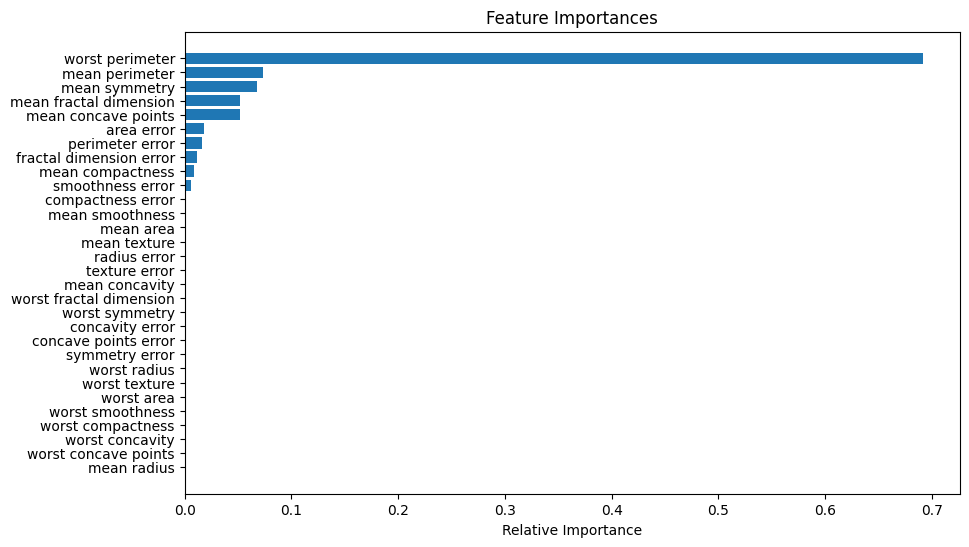

In [11]:
# Feature importance
importances = dt_model.feature_importances_[::-1]
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()

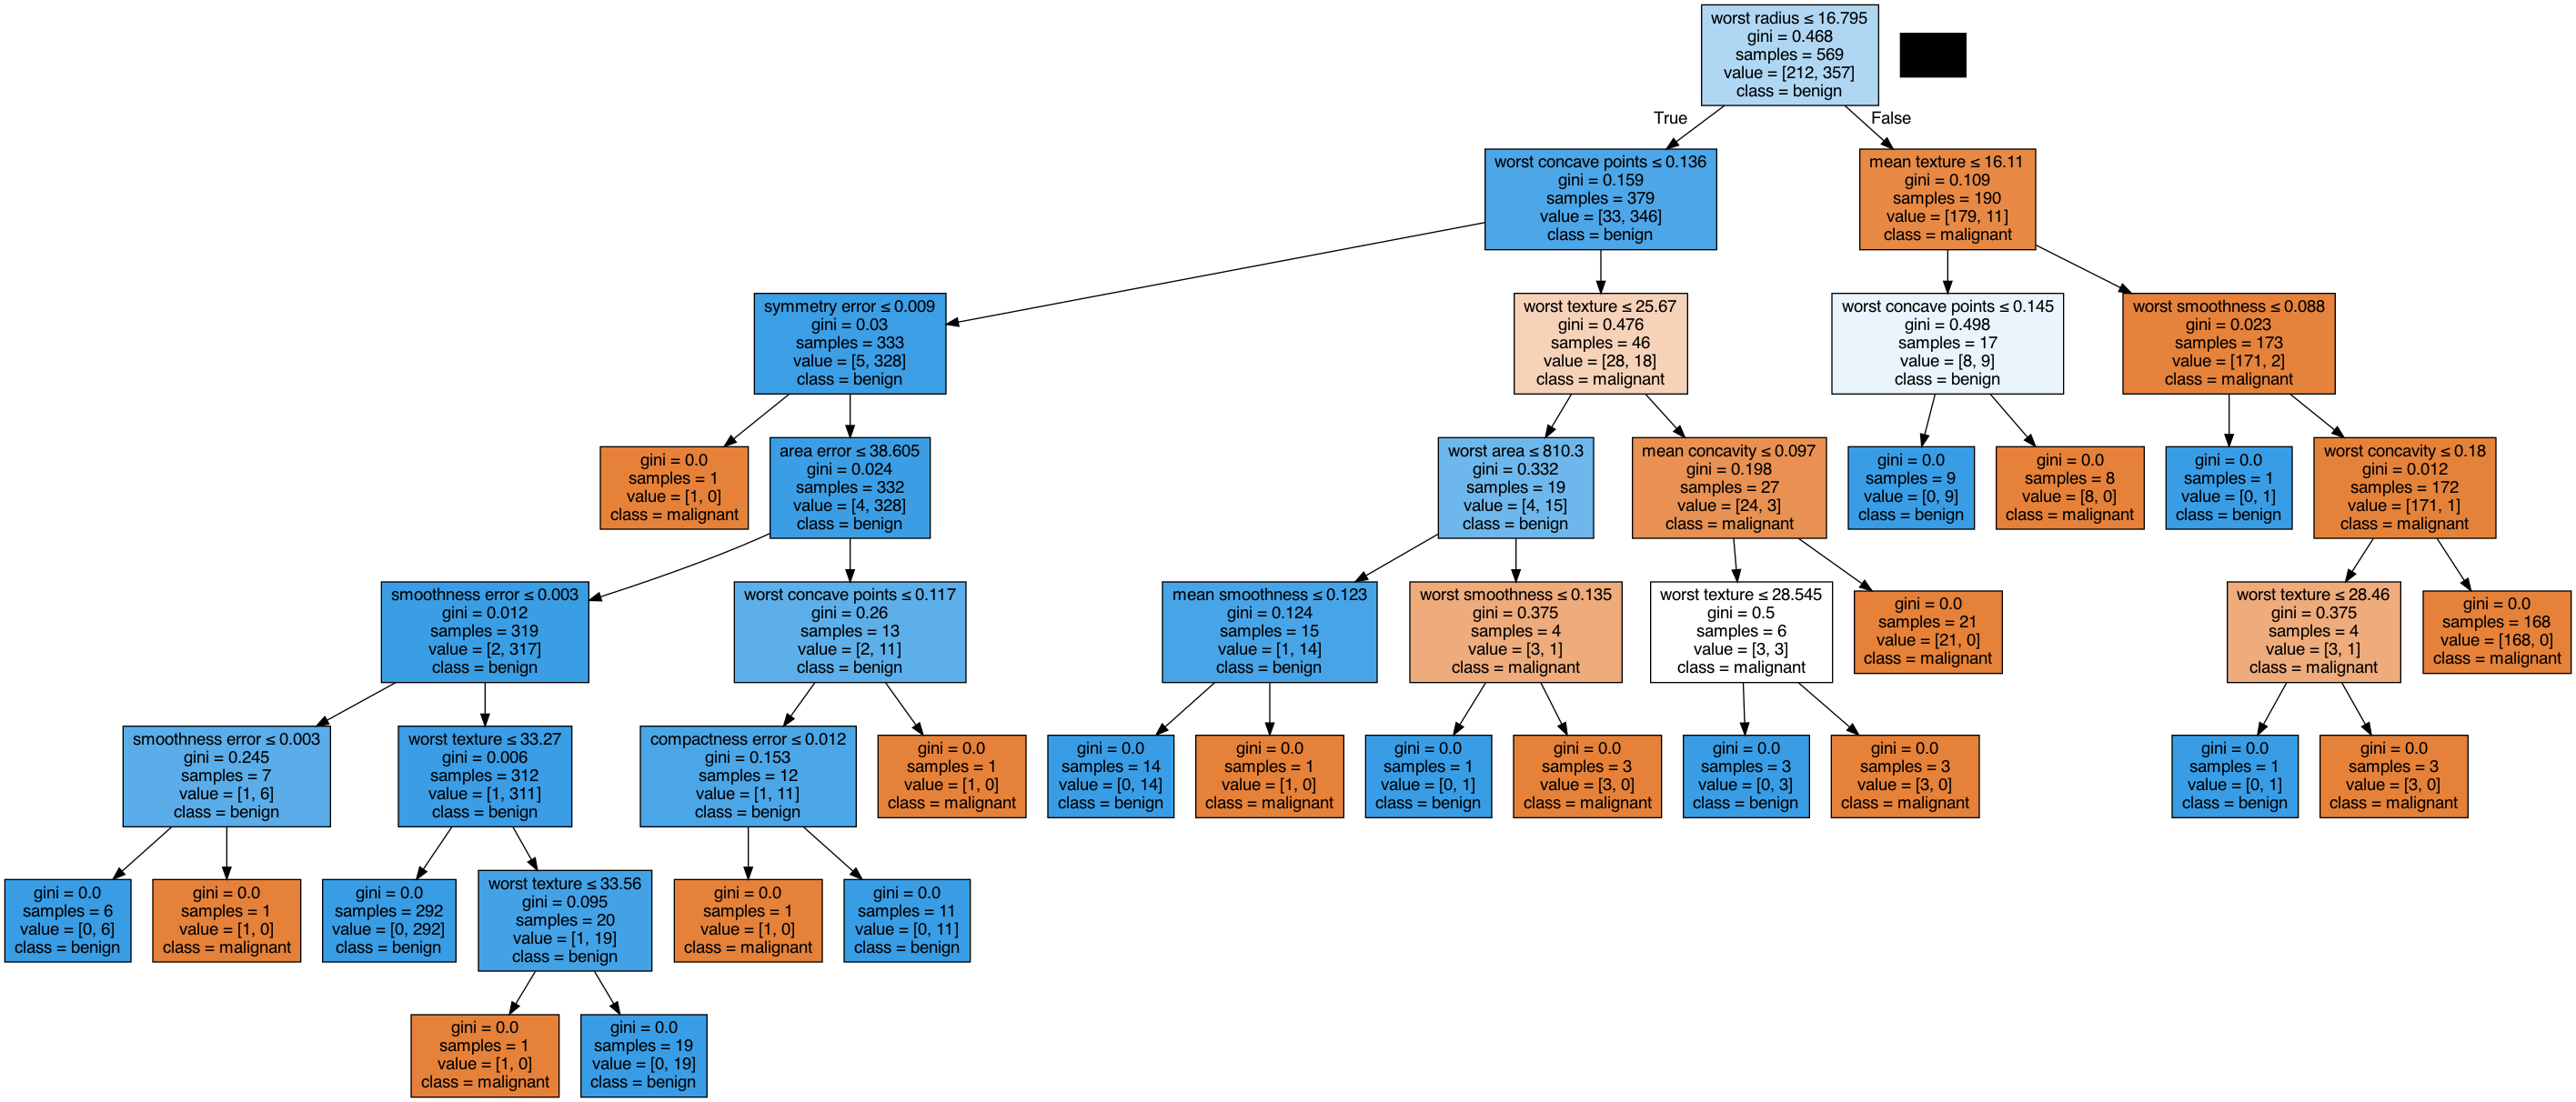

In [3]:
arbol = DecisionTreeClassifier(max_depth=30)
arbol.fit(data_cancer["data"], data_cancer["target"])

dibujar_arbol(arbol)